<br />
<div style="text-align: center;">
    <span style="font-weight: bold; color:#6dc; font-family: 'Arial'; font-size: 2.5em;">Twice-weekly Sea Surface Temperature Anomalies (NOAA)</span>
</div>

<span style="color:#6dc; font-family: 'Arial'; font-size: 1.5em;">
Data taken from: https://www.esrl.noaa.gov/psd/data/gridded/data.kaplan_sst.html</span>

In [1]:
import numpy as np
import os
import urllib2
import shutil
from contextlib import closing
import xarray as xr
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import netCDF4
import matplotlib
np.set_printoptions(threshold='nan')

/Users/vizzuality/anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
remote_path = 'ftp://ftp.cdc.noaa.gov/Datasets/kaplan_sst/'
last_file = 'sst.mon.anom.nc'
local_path = os.getcwd()

In [3]:
#Download the file .nc
with closing(urllib2.urlopen(remote_path+'/'+last_file)) as r:
    with open(str(last_file), 'wb') as f:
        shutil.copyfileobj(r, f)

In [4]:
ncfile = xr.open_dataset(local_path+'/'+last_file, decode_times=False)

In [5]:
print('* Variables disponibles en el fichero:')
for v in ncfile.variables:
    print(v)

* Variables disponibles en el fichero:
lat
lon
time
sst


In [6]:
print ncfile.variables['sst']

<xarray.Variable (time: 1937, lat: 36, lon: 72)>
[5020704 values with dtype=float64]
Attributes:
    long_name:     Monthly Anomalies of SST
    valid_range:   [-8.  8.]
    units:         degC
    precision:     2
    var_desc:      Sea Surface Temperature
    dataset:       Kaplan Extended SST V2
    level_desc:    Surface
    statistic:     Anomaly
    parent_stat:   Other
    actual_range:  [-4.57700014  6.46104145]


In [7]:
ncfile.info()

xarray.Dataset {
dimensions:
	lat = 36 ;
	lon = 72 ;
	time = 1937 ;

variables:
	float32 lat(lat) ;
		lat:units = degrees_north ;
		lat:actual_range = [-87.5  87.5] ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:axis = Y ;
	float32 lon(lon) ;
		lon:units = degrees_east ;
		lon:long_name = Longitude ;
		lon:actual_range = [   2.5  357.5] ;
		lon:standard_name = longitude ;
		lon:axis = X ;
	float64 time(time) ;
		time:units = days since 1800-1-1 00:00:00 ;
		time:long_name = Time ;
		time:delta_t = 0000-01-00 00:00:00 ;
		time:avg_period = 0000-01-00 00:00:00 ;
		time:standard_name = time ;
		time:axis = T ;
		time:actual_range = [ 20453.  79378.] ;
	float64 sst(time, lat, lon) ;
		sst:long_name = Monthly Anomalies of SST ;
		sst:valid_range = [-8.  8.] ;
		sst:units = degC ;
		sst:precision = 2 ;
		sst:var_desc = Sea Surface Temperature ;
		sst:dataset = Kaplan Extended SST V2 ;
		sst:level_desc = Surface ;
		sst:statistic = Anomaly ;
		sst:parent_stat = Other ;


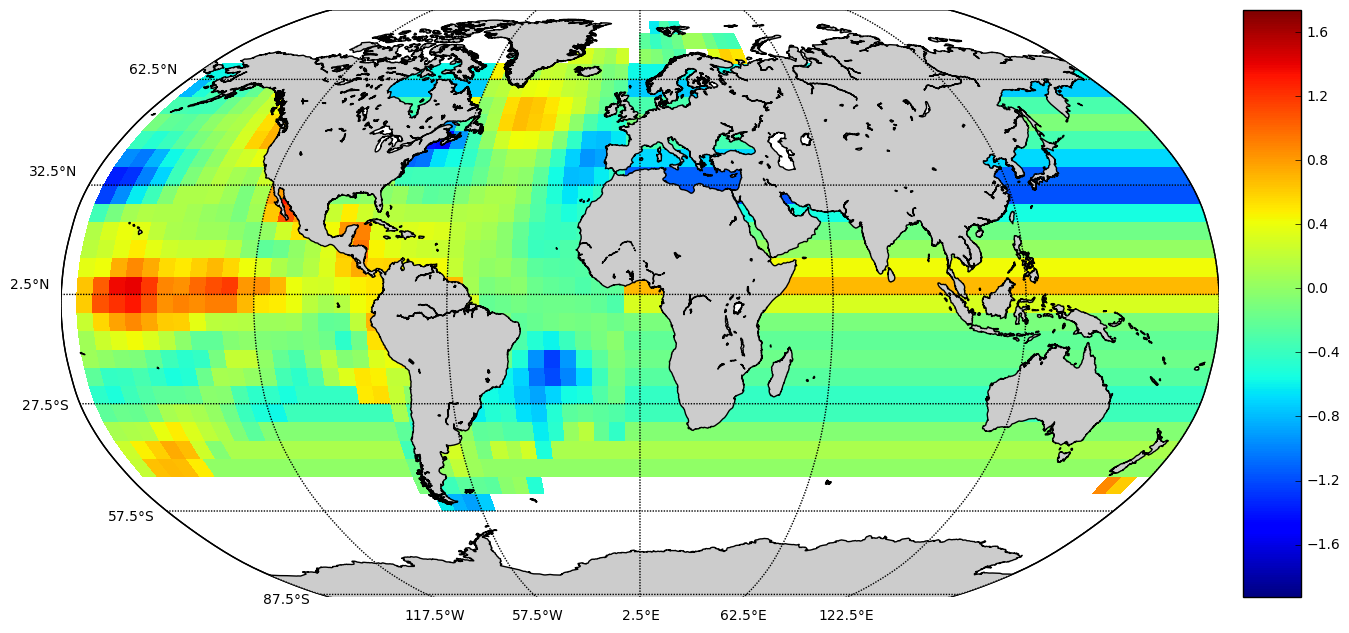

In [8]:
local_path = os.getcwd()


# set up the figure
plt.figure(figsize=(16,12))

url=local_path+'/'+last_file

# Extract the significant 

file = netCDF4.Dataset(url)
lat  = file.variables['lat'][:]
lon  = file.variables['lon'][:]
data = file.variables['sst'][1,:,:]
file.close()

m=Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=-87.5, lon_0=2.5)

# convert the lat/lon values to x/y projections.

x, y = m(*np.meshgrid(lon,lat))
m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
m.colorbar(location='right')

# Add a coastline and axis values.

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-87.5,87.5,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(2.5,357.5,60.),labels=[0,0,0,1])

plt.show()

# make image
plt.imshow(data,origin='lower') 

<span style="color:#6dc; font-family: 'Arial'; font-size: 2em;">
**Another way to see the data**</span>

[u'lat', u'lon', u'time', u'sst']
<type 'netCDF4._netCDF4.Variable'>
float32 sst(time, lat, lon)
    long_name: Monthly Anomalies of SST
    valid_range: [-8.  8.]
    units: degC
    missing_value: -9.96921e+36
    precision: 2
    var_desc: Sea Surface Temperature
    dataset: Kaplan Extended SST V2
    level_desc: Surface
    statistic: Anomaly
    parent_stat: Other
    actual_range: [-4.57700014  6.46104145]
unlimited dimensions: time
current shape = (1937, 36, 72)
filling on, default _FillValue of 9.96920996839e+36 used



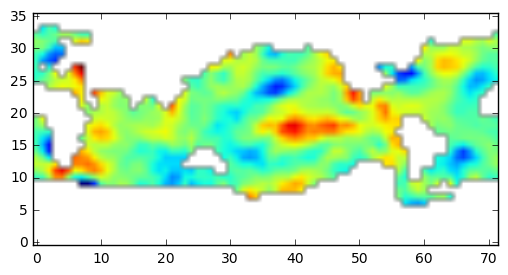

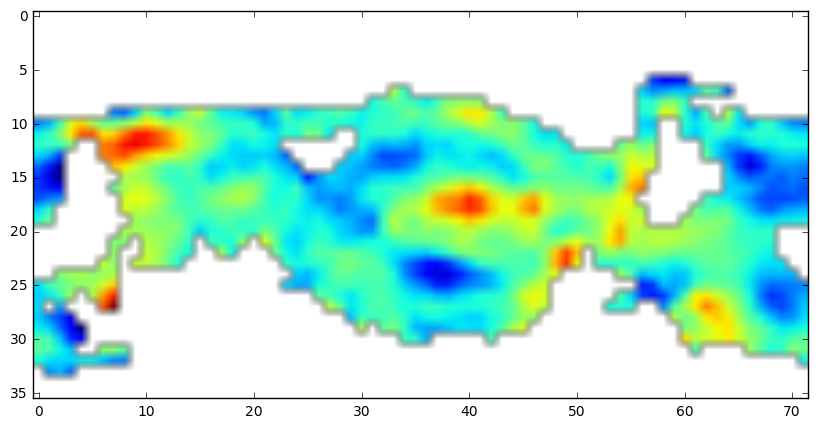

In [9]:
remote_path = 'ftp://ftp.cdc.noaa.gov/Datasets/kaplan_sst/'
last_file = 'sst.mon.anom.nc'
local_path = os.getcwd()

# open a local NetCDF file or remote OPeNDAP URL
url = local_path+'/'+last_file
nc = netCDF4.Dataset(url)

# examine the variables
print nc.variables.keys()
print nc.variables['sst']

topo = nc.variables['sst'][0,:,:]

# make image
plt.figure(figsize=(10,10))
plt.imshow(topo)
plt.show()

<span style="color:#6dc; font-family: 'Arial'; font-size: 2em;">
**To Github**</span>

In [10]:
import numpy as np
import os
import urllib2
import shutil
from contextlib import closing
from netCDF4 import Dataset
import rasterio
import tinys3
np.set_printoptions(threshold='nan')

In [11]:
def dataDownload(): 
    remote_path = 'ftp://ftp.cdc.noaa.gov/Datasets/kaplan_sst/'
    last_file = 'sst.mon.anom.nc'
    local_path = os.getcwd()
    print remote_path
    print last_file
    print local_path

    #Download the file .nc
    with closing(urllib2.urlopen(remote_path+'/'+last_file)) as r:
        with open(str(last_file), 'wb') as f:
            shutil.copyfileobj(r, f)

    ncfile = Dataset(local_path+'/'+last_file)
    
    return last_file

In [12]:
def netcdf2tif(dst,outFile):
    nc = Dataset(dst)
    data = nc['sst'][0,:,:]
            
    data[data < -8] = -99
    data[data > 8] = -99
    # Converting in to zero for the output raster
    #np.putmask(data, data < -8, -99)
    
    print data
    
    # Return lat info
    south_lat = -88.75
    north_lat = 88.75

    # Return lon info
    west_lon = -177.5
    east_lon = 177.5
    # Transformation function
    transform = rasterio.transform.from_bounds(west_lon, south_lat, east_lon, north_lat, data.shape[1], data.shape[0])
    # Profile
    profile = {
        'driver':'GTiff', 
        'height':data.shape[0], 
        'width':data.shape[1], 
        'count':1, 
        'dtype':np.float64, 
        'crs':'EPSG:4326', 
        'transform':transform, 
        'compress':'lzw', 
        'nodata': -99
    }
    with rasterio.open(outFile, 'w', **profile) as dst:
        dst.write(data.astype(profile['dtype']), 1)

In [13]:
def s3Upload(outFile):
    # Push to Amazon S3 instance
    conn = tinys3.Connection(os.getenv('S3_ACCESS_KEY'),os.getenv('S3_SECRET_KEY'),tls=True)
    f = open(outFile,'rb')
    conn.upload(outFile,f,os.getenv('BUCKET'))

In [14]:
# Execution
outFile ='ssta.tif'
print 'starting'
file = dataDownload()
print 'downloaded'
netcdf2tif(file,outFile)
print 'converted'
#s3Upload(outFile)
print 'finish'

starting
ftp://ftp.cdc.noaa.gov/Datasets/kaplan_sst/
sst.mon.anom.nc
/Users/vizzuality/Documents/Vizzuality/RW/planet_pulse/Notebooks
downloaded
[[-99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0
  -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0
  -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0
  -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0
  -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0
  -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0]
 [-99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0
  -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0
  -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0
  -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0
  -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -99.0
  -99.0 -99.0 -99.0 -99.0 -99.0 -99.0 -9

Source:  <open RasterReader name='./ssta.tif' mode='r'>
Source mode:  r
.TIF Shape:  (36, 72)
Source type: ('float64',)
CRS({'init': u'epsg:4326'})
[-177.5, 4.930555555555555, 0.0, 88.75, 0.0, -4.930555555555555]


/Users/vizzuality/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


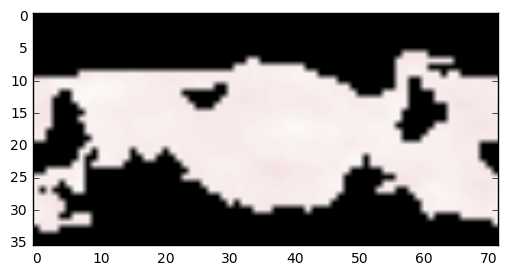

In [15]:
src = rasterio.open('./'+outFile)
print 'Source: ',src
print 'Source mode: ',src.mode

array = src.read(1)
print '.TIF Shape: ',array.shape

print 'Source type:',src.dtypes
print(src.crs)
print(src.transform)

from matplotlib import pyplot
pyplot.imshow(array, cmap='gist_earth')

pyplot.show()